<div style="border:solid green 2px; padding: 20px">

<b>Привет, Даниил! Поздравляю с выполнением очередного проекта!!</b>

Меня зовут Петр Раздобреев и я буду проверять твою работу. Попробую помочь сделать тебе её еще лучше! В Практикуме принято общени на ты, но если это дискомфортно, то сообщи об этом)

Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>☁️Так выделены самые важные замечания. Без их отработки проект не будет принят. </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>⛅️ Так выделены небольшие замечания.Такие замечания в проекте допустимы, это пространство для улучшений в будущем.
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️Так я выделяю успешные идеи.</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комменатри — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 
    

# Исcледование сервиса аренды самокатов GoFast

В рамках учебного проекта мы получили данные о пользователях сервиса аренды самокатов GoFast из нескольких городов, а также об их поездках. Наша задача — проанализировать эти данные и проверить гипотезы, которые помогут бизнесу вырасти.

Для передвижения по городу пользователи GoFast используют мобильное приложение. Сервис предлагает два тарифа:

* Без подписки: 

    * абонентская плата отсутствует; 
    
    * стоимость одной минуты поездки — 8 рублей; 
    
    * стоимость старта (начала поездки) — 50 рублей;
    
* С подпиской Ultra: 

    * абонентская плата составляет 199 рублей в месяц;
    
    * стоимость одной минуты поездки — 6 рублей; 
    
    * стоимость старта — бесплатно.

## **Описание данных**

DataFrame **df_users** содержит следующую информацию о пользователях: 

* **user_id** - уникальный идентификатор пользователя

* **name** - имя пользователя

* **age** - возраст

* **city** - город

* **subscription_type**	- тип подписки (free, ultra)

DataFrame **df_riders** содержит следующую информацию о поездках:

* **user_id** -	уникальный идентификатор пользователя

* **distance** - расстояние, которое пользователь проехал в текущей сессии (в метрах)

* **duration** - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»

* **date** - дата совершения поездки

DataFrame **df_subscription** содержит следующую информацию о подписках:

* **subscription_type** - тип подписки

* **minute_price** - стоимость одной минуты поездки по данной подписке

* **start_ride_price** - стоимость начала поездки

* **subscription_fee** - стоимость ежемесячного платежа

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

## Обзор данных

In [2]:
df_users = pd.read_csv('/datasets/users_go.csv')
df_riders = pd.read_csv('/datasets/rides_go.csv')
df_subscription = pd.read_csv('/datasets/subscriptions_go.csv')

In [3]:
pd.set_option('display.max_columns', None)

### Общая информация о пользователях

In [4]:
df_users.head(10)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


In [5]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


### Общая информация о поездках

In [6]:
df_riders.head(10)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


In [7]:
df_riders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Замечательно, что знакомишься с датафреймом выводя и несколько первых строк и обзорную информацию при помощи `info`

In [8]:
df_riders[['distance', 'duration']].describe()

,distance,duration
count,18068.000000,18068.000000
mean,3070.659976,17.805011
std,1116.831209,6.091051
min,0.855683,0.500000
25%,2543.226360,13.597563
50%,3133.609994,17.678395
75%,3776.222735,21.724800
max,7211.007745,40.823963


 ### Общая информация о подписках

In [9]:
df_subscription.head(10)

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [10]:
df_subscription.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


### Вывод

В DataFrame **df_riders** у столбца **date**, который хранит даты совершённых поездок, неправильный тип данных. Возможно, в **df_users** в столбцах **user_id** и **city** есть дубликаты.

## Предобработка данных

In [11]:
df_riders['date'] = pd.to_datetime(df_riders['date'])

Изменили тип данных в столбце **date** c **object** на **datetime64**.

In [12]:
df_riders['month_number'] = df_riders['date'].dt.month

Добавили в DataFrame новый столбец, который содержит номера месяцев.

In [13]:
df_users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [14]:
df_riders.isna().sum()

user_id         0
distance        0
duration        0
date            0
month_number    0
dtype: int64

In [15]:
df_subscription.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

Пропуски отсутствуют.

In [16]:
df_users['city'].sort_values().unique()

array(['Екатеринбург', 'Краснодар', 'Москва', 'Омск', 'Пятигорск',
       'Ростов-на-Дону', 'Сочи', 'Тюмень'], dtype=object)

Неявные дубликаты в названиях городов отсутствуют.

In [17]:
df_users.duplicated(subset='user_id').sum()

31

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
И про дубликаты не забываешь, замечательно. Но действия по первичному анализу датафреймов схожи, можно было бы функцию написать 

In [18]:
df_users = df_users.drop_duplicates(subset=['user_id']).reset_index(drop=True)

Удалим дубликаты в столбце **users_id**

## Исследовательский анализ данных

### Частота встречаемости городов

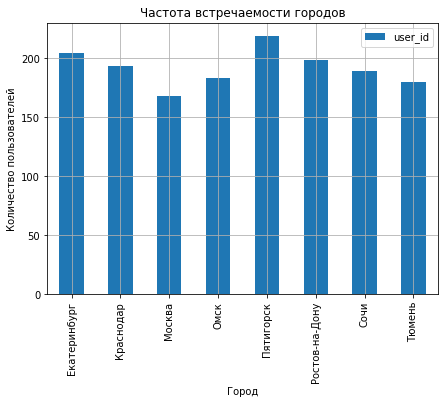

In [19]:
df_users.pivot_table(
    index='city', 
    values='user_id', 
    aggfunc='count'
).plot(
    kind='bar',
    figsize=(7, 5),
    grid=True
)
plt.ylabel('Количество пользователей')
plt.xlabel('Город')
plt.title('Частота встречаемости городов')
plt.show()

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Подписи осей и заголовок - отлично, ещё можно было бы сортировать значения, так график информативнее будет и проще считывать информацию 

In [20]:
df_users.pivot_table(
    index='city', 
    values='user_id', 
    aggfunc='count'
).sort_values(by='user_id')

,user_id
city,
Москва,168
Тюмень,180
Омск,183
Сочи,189
Краснодар,193
Ростов-на-Дону,198
Екатеринбург,204
Пятигорск,219


**Вывод:**

Города в датафрейме встречаются с небольшим разбросом. Москва встречается реже всего — 168 раз. Чаще всего встречается Пятигорск — 219 раз.

###  Cоотношение пользователей с подпиской и без подписки

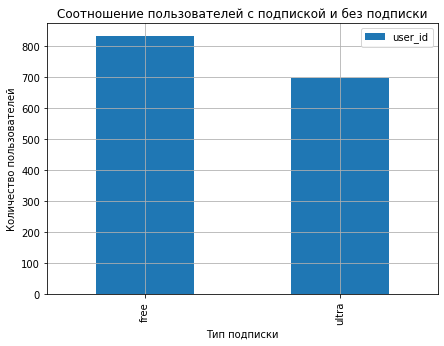

In [21]:
df_users.pivot_table(
    index='subscription_type', 
    values='user_id', 
    aggfunc='count'
).plot(
    kind='bar',
    figsize=(7, 5),
    grid=True
)
plt.ylabel('Количество пользователей')
plt.xlabel('Тип подписки')
plt.title('Cоотношение пользователей с подпиской и без подписки')
plt.show()

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Для разнообразия можно было бы строить круговую диаграмму

In [22]:
df_users.pivot_table(
    index='subscription_type', 
    values='user_id', 
    aggfunc='count'
)

,user_id
subscription_type,
free,835
ultra,699


**Вывод:**

В данных преобладают пользователи с бесплатной подпиской.

### Возраст пользователей

In [23]:
df_users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

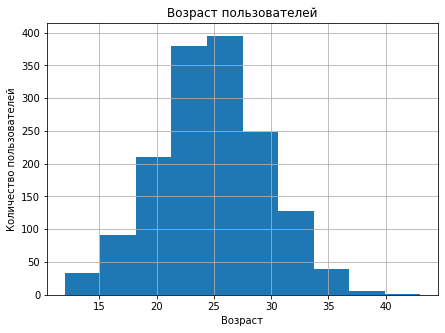

In [24]:
df_users['age'].hist(figsize=(7, 5))
plt.ylabel('Количество пользователей')
plt.xlabel('Возраст')
plt.title('Возраст пользователей')
plt.show()

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Было бы хорошо добавить акцент и на довольно юных пользователях, кстати здесь вопрос, а законадательно возможно ли это. Такие факты хорошо бы проверять, выходя чуть за рамки непосредственно задания

**Вывод:** 

Возраст пользователей в основном сосредоточен в диапазоне от 18 до 30 лет. Количество пользователей старше 40 лет минимально.

### Расстояние, которое пользователь преодолел за одну поездку

In [25]:
df_riders['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

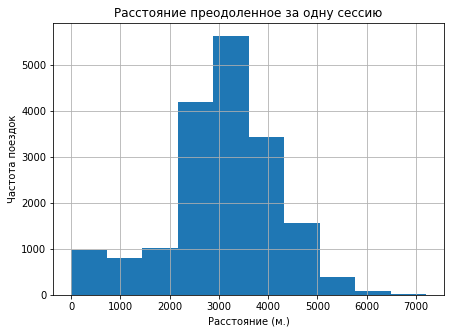

In [26]:
df_riders['distance'].hist(figsize=(7, 5))
plt.ylabel('Частота поездок')
plt.xlabel('Расстояние (м.)')
plt.title('Расстояние преодоленное за одну сессию')
plt.show()

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Наличие пары пиков дистанций наталкивает на мысль, что может быть несколько сценариев пользования приложением и с этими категориями стоит отдельно работать

**Вывод:** 

В основном пользователи за поездку проезжают от 2 до 5 км. Довольно редко встречаются сессии с преодолённым расстоянием более 6 км.

### Продолжительность поездок

In [27]:
df_riders['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

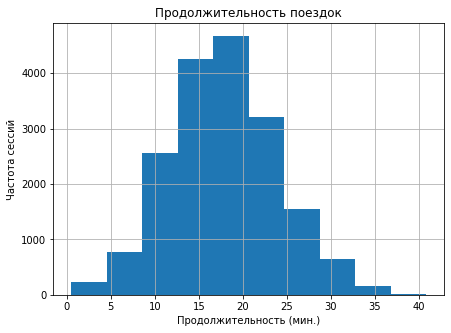

In [28]:
df_riders['duration'].hist(figsize=(7, 5))
plt.ylabel('Частота сессий')
plt.xlabel('Продолжительность (мин.)')
plt.title('Продолжительность поездок')
plt.show()

<div class="alert alert-info"> <b>Комментарий студента:</b> Привет! Ниже провёл дополнительный анализ.</div>

In [29]:
df_riders.query('duration < 1 and distance > 4000')

,user_id,distance,duration,date,month_number
6531,701,4196.445201,0.5,2021-08-31,8
6570,704,4830.824371,0.5,2021-10-14,10
6680,712,4684.004397,0.5,2021-03-04,3
6695,713,5215.642710,0.5,2021-02-25,2
6768,718,5197.436649,0.5,2021-02-11,2
...,...,...,...,...,...
17004,1460,5531.335845,0.5,2021-01-19,1
17242,1477,6724.932981,0.5,2021-01-12,1
17314,1483,4445.481070,0.5,2021-03-06,3
17505,1496,5722.551787,0.5,2021-02-14,2


Анализ данных показал, что аномально короткие поездки, вероятно, вызваны сбоем в системе. Он как-то связан с продолжительностью поездки и возникает у пользователей, проехавших 4+ км. Стоит сообщить об этой ошибке ответственному лицу.

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>⛅️ 

Рекомендовал бы внимательнее рассмотреть поездки, которые длились до минуты, это похоже на аномалии и стоит убедиться, короткие ли это поездки или какие-то сбои логирования
</div>

**Вывод:** 

Большинство поездок приблизительно длятся от 8 до 25 минут. Количество поездок продолжительностью менее 5 минут и более 30 минут значительно меньше чем остальных. 

## Объединение данных

###  Объединение данных о пользователях, поездках и подписках в один датафрейм

In [30]:
merged_df = df_riders.merge(right=df_users, on='user_id', how='left')

In [31]:
merged_df = merged_df.merge(right=df_subscription, on='subscription_type', how='left')

<div class="alert alert-info"> <b>Комментарий студента:</b> Здесь я провёл дополнительную проверку и исправил ошибку, на которую ты обратил внимание в «подсчёте выручки».</div>

In [32]:
merged_df['duration'] = np.ceil(merged_df['duration'])

Округлили значения в столбце duration до следующего целого числа.

Проверим объединенный датафрейм на наличие пропусков и соответствие ожидаемому размеру.

In [33]:
merged_df.isna().sum()

user_id              0
distance             0
duration             0
date                 0
month_number         0
name                 0
age                  0
city                 0
subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

In [34]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   distance           18068 non-null  float64       
 2   duration           18068 non-null  float64       
 3   date               18068 non-null  datetime64[ns]
 4   month_number       18068 non-null  int64         
 5   name               18068 non-null  object        
 6   age                18068 non-null  int64         
 7   city               18068 non-null  object        
 8   subscription_type  18068 non-null  object        
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.8+ MB


In [35]:
merged_df.head(10)

,user_id,distance,duration,date,month_number,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,26.0,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,16.0,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,7.0,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,19.0,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,27.0,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199
5,1,2770.890808,17.0,2021-10-09,10,Кира,22,Тюмень,ultra,6,0,199
6,1,3039.020292,15.0,2021-10-19,10,Кира,22,Тюмень,ultra,6,0,199
7,1,2842.118050,24.0,2021-11-06,11,Кира,22,Тюмень,ultra,6,0,199
8,1,3412.690668,16.0,2021-11-14,11,Кира,22,Тюмень,ultra,6,0,199
9,1,748.690645,16.0,2021-11-22,11,Кира,22,Тюмень,ultra,6,0,199


Всё в порядке

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>☁️

Прошу ещё добавить проверку, что после соединения таблиц не возникли пропуски, что размер объъединенной таблице соответствует ожиданиям

</div>

### Датафрейм c данными о пользователях без подписки

Создадим новый датафрейм, в котором будет содержаться информация о пользователях без подписки.

In [36]:
df_subscription_free = merged_df.query('subscription_type == "free"')

### Датафрейм с данными о пользователях с подпиской

Создадим новый датафрейм, в котором будет содержаться информация о пользователях с подпиской **Ultra**.

In [37]:
df_subscription_ultra = merged_df.query('subscription_type == "ultra"')

### Визуализация информации о расстоянии и времени поездок

**Сравним на графике расстояние, которое проезжают пользователи с подпиской и без неё.**

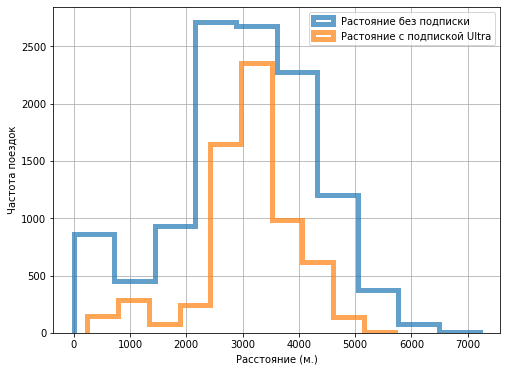

In [38]:
ax = df_subscription_free.plot(
    kind='hist',
    y='distance',
    histtype='step',
    bins=10,
    linewidth=5,
    alpha=0.7,
    label='Растояние без подписки',
    figsize=(8, 6),
   
)
df_subscription_ultra.plot(
    kind='hist',
    y='distance',
    histtype='step',
    bins=10,
    linewidth=5,
    alpha=0.7,
    label='Растояние с подпиской Ultra',
    ax=ax,
    grid=True,
    legend=True,
   
) 
plt.ylabel('Частота поездок')
plt.xlabel('Расстояние (м.)')
plt.show()

**Сравним время, которое тратят пользователи на одну сессию с подпиской и без подписки.**

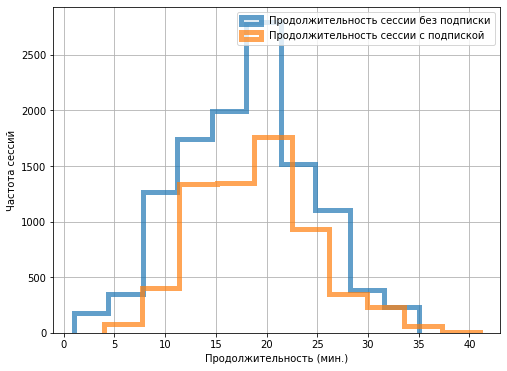

In [39]:
ax = df_subscription_free.plot(
    kind='hist',
    y='duration',
    histtype='step',
    bins=10,
    linewidth=5,
    alpha=0.7,
    label='Продолжительность сессии без подписки',
    figsize=(8, 6),
   
)
df_subscription_ultra.plot(
    kind='hist',
    y='duration',
    histtype='step',
    bins=10,
    linewidth=5,
    alpha=0.7,
    label='Продолжительность сессии с подпиской',
    ax=ax,
    grid=True,
    legend=True,
   
)
plt.ylabel('Частота сессий')
plt.xlabel('Продолжительность (мин.)')
plt.show()

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
* Отличная идея на одном графике отобразить оба тарифа, так их максимально удобно сравнивать, спасибо!
* На графиках отлично смотрится среднее или медиана, как дополнительное опорной значение, вот [тут](https://stackoverflow.com/questions/16930328/vertical-horizontal-lines-in-matplotlib) можно посмотреть, как добавить такую визуализацию

**Вывод:**

основное количество поездок у пользователей с подпиской приходится на примерно 3–4 км, в то время как у пользователей без подписки разброс больше. Время на поездку пользователи обеих категорий тратят приблизительно одинаково. Также стоит отметить, что в данных представлено меньше пользователей с подпиской, чем без неё.

## Подсчёт выручки

In [40]:
df_revenue = merged_df.groupby(['user_id', 'month_number'])[['distance','duration']].agg(['sum', 'count'])
#cоздаём новый датафрейм с агрегированными данными о поездках
df_revenue.columns = ['total_distance', 'count_rides', 'total_duration', 'count']
#переименовываем столбцы
df_revenue.drop('count', axis=1, inplace=True)
#удаляем дубликат столбца count_rides
df_revenue  = df_revenue.reset_index()
#сбрасываем индексы, чтобы получить user_id и month_number в качестве столбцов
df_revenue.head(10)

,user_id,month_number,total_distance,count_rides,total_duration
0,1,1,7027.511294,2,42.0
1,1,4,754.159807,1,7.0
2,1,8,6723.470560,2,46.0
3,1,10,5809.911100,2,32.0
4,1,11,7003.499363,3,56.0
5,1,12,6751.629942,2,28.0
6,2,3,10187.723006,3,63.0
7,2,4,6164.381824,2,40.0
8,2,6,3255.338202,1,14.0
9,2,7,6780.722964,2,48.0


<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>☁️

Округление ожидалось до агрегации, ещё на этапе датафрейма `merged_df`
</div>

In [41]:
df_revenue = df_revenue.merge(right=df_users, on='user_id', how='left')
#добавляем в df_revenue столбец subscription_type из df_users
df_revenue.drop(['name', 'age', 'city'], axis=1, inplace=True)
#удаляем лишние столбцы
df_revenue = df_revenue.merge(right=df_subscription, on='subscription_type', how='left')
#добавляем в df_revenue столбцы нужные для вычислений из df_subscription
df_revenue['monthly_revenue'] = (
    df_revenue['start_ride_price'] *  df_revenue['count_rides']
) + (
    df_revenue['minute_price'] * df_revenue['total_duration']
) + df_revenue['subscription_fee']
#добавляем столбец monthly_revenue, который будет хранить в себе результаты вычислений, в df_revenue и проводим вычисления 
df_revenue.drop(['minute_price', 'start_ride_price', 'subscription_fee'], axis=1, inplace=True)
#ещё раз удаляем лишние столбцы
df_revenue.head(10)

,user_id,month_number,total_distance,count_rides,total_duration,subscription_type,monthly_revenue
0,1,1,7027.511294,2,42.0,ultra,451.0
1,1,4,754.159807,1,7.0,ultra,241.0
2,1,8,6723.470560,2,46.0,ultra,475.0
3,1,10,5809.911100,2,32.0,ultra,391.0
4,1,11,7003.499363,3,56.0,ultra,535.0
5,1,12,6751.629942,2,28.0,ultra,367.0
6,2,3,10187.723006,3,63.0,ultra,577.0
7,2,4,6164.381824,2,40.0,ultra,439.0
8,2,6,3255.338202,1,14.0,ultra,283.0
9,2,7,6780.722964,2,48.0,ultra,487.0


## Проверка гипотез

### Тратят ли пользователи с подпиской больше времени на поездки?

* Нулевая гипотеза: пользователи с подпиской не тратят больше времени на поездки, чем пользователи без подписки.

* Альтернативная гипотеза: пользователи с подпиской тратят больше времени на поездки, чем пользователи без подписки.


In [42]:
alpha = 0.05

first_group_ultra = df_subscription_ultra['duration']

first_group_free = df_subscription_free['duration']

results = st.ttest_ind(first_group_ultra, first_group_free, alternative='greater')

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергать нулевую гипотезу')

p-value: 2.4959453720736625e-34
Отвергаем нулевую гипотезу


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Отлично, что формулируешь нулевую, альтернативную гипотезу, это важно, выводы верны, ещё могу порекомендовать дополнительно проверять себя и выводить среднее проверяемых переменных или распределения

**Вывод:**

Гипотезу о том, что пользователи с подпиской тратят больше времени на поездки, мы не можем отвергнуть.

### Cреднее расстояние, которое проезжают пользователи с подпиской за одну поездку

* Нулевая гипотеза: пользователи с подпиской проезжают в среднем  3130 метров.

* Альтернативная гипотеза: пользователи с подпиской проезжают в среднем больше 3130 метров.

In [43]:
alpha = 0.05

interested_value = 3130

first_group_ultra = df_subscription_ultra['distance']

results = st.ttest_1samp(first_group_ultra, interested_value, alternative='greater')

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергать нулевую гипотезу')

p-value: 0.9195368847849785
Нет оснований отвергать нулевую гипотезу


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Бизнес может спать спокойно, с износом всё в порядке

**Вывод:**

мы не можем отвергнуть нулевую гипотезу о том, что пользователи с подпиской проезжают в среднем 3130 метров.

### Будет ли помесячная выручка от пользователей с подпиской по месяцам выше

* Нулевая гипотеза: помесячная выручка от пользователей с подпиской по месяцам такая же как от пользователей без подписки.

* Альтернативная гипотеза: помесячная выручка от пользователей с подпиской по месяцам больше, чем выручка от пользователей без подписки.

In [44]:
alpha = 0.05

first_group_ultra_revenue = (
    df_revenue.query('subscription_type == "ultra"')
    .groupby('month_number')['monthly_revenue']
    .agg('mean')
)

first_group_free_revenue = (
    df_revenue.query('subscription_type == "free"')
    .groupby('month_number')['monthly_revenue']
    .agg('mean')
)

results = st.ttest_ind(first_group_ultra_revenue, first_group_free_revenue, alternative='greater')

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергать нулевую гипотезу')

p-value: 8.517956987709186e-13
Отвергаем нулевую гипотезу


**Вывод:** 

Мы не можем отвергнуть гипотезу о том, что помесячная выручка от пользователей с подпиской по месяцам превышает выручку от пользователей без подписки.

### Различия между двумя выборками до и после обновления.

Чтобы проверить эту гипотезу, нам нужен двухвыборочный t-тест для зависимых выборок. У нас есть данные о количестве обращений одного и того же пользователя до и после обновления серверов. Это делает выборки зависимыми. Также мы хотим выяснить, есть ли статистически значимая разница в среднем количестве обращений до и после обновления.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Как будет звучать альтернативная гипотеза? 

## Общий вывод

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>☁️

Вывода не хватило
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Добавил общий вывод, которого не было в первой версии проекта.</div>

В ходе учебного проекта по исследованию сервиса аренды самокатов GoFast мы провели исследовательский анализ, который показал, что:

* города в представленных данных встречаются с минимальным разбросом, однако Москва встречается реже всего, а Пятигорск — чаще всего.

* В данных преобладают пользователи без подписки. В основном возраст пользователей сервиса находится в диапазоне от 18 до 30 лет, медианное значение — 25.

* Пользователи проезжают на самокатах в среднем от 2 до 5 км, а поездки длятся в основном от 8 до 25 минут.

Также в рамках статистического анализа мы проверили некоторые гипотезы и вот к чему пришли:

* Мы не смогли опровергнуть гипотезу о том, что пользователи с подпиской тратят больше времени, чем без неё.

* Также не смогли отвергнуть гипотезу о том, что пользователи с подпиской проезжают в среднем 3130 метров.

* Не смогли опровергнуть гипотезу, что средняя выручка по месяцам от пользователей с подпиской больше, чем без неё.